In [2]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('world_pop.csv')

In [4]:
# Importing csv, dropping unnecessary columns and renaming some columns

df = pd.read_csv('world_pop.csv')
df = df.drop(['Indicator Name','Indicator Code','Unnamed: 69'],axis=1)
df = df.rename(columns={'Country Name':'country_name','Country Code':'country_code'})

In [5]:
#df['country_name'].unique()

# This data will be saved to csv and imported into SQL Server. In order avoid issues, identifying country names where there is a comma in. 

df[df['country_name'].str.contains(",")]['country_name']


23                                          Bahamas, The
43                                      Congo, Dem. Rep.
44                                           Congo, Rep.
67                                      Egypt, Arab Rep.
79                                 Micronesia, Fed. Sts.
86                                           Gambia, The
96                                  Hong Kong SAR, China
112                                   Iran, Islamic Rep.
126                                          Korea, Rep.
146                                     Macao SAR, China
153    Middle East, North Africa, Afghanistan & Pakistan
161    Middle East, North Africa, Afghanistan & Pakis...
193                            Korea, Dem. People's Rep.
213                                   Somalia, Fed. Rep.
238    Middle East, North Africa, Afghanistan & Pakis...
254                                        Venezuela, RB
262                                          Yemen, Rep.
Name: country_name, dtype: obje

In [6]:
# Removing comma from country name replace it with no character
df = df.replace(",","",regex=True)
df[df['country_name'].str.contains(",")]['country_name']

Series([], Name: country_name, dtype: object)

In [7]:
# Unpivoting table to get years in a column and values in another

df2 = pd.melt(df, id_vars=["country_name", "country_code"], var_name="year", value_name="population")
df2.head()

,country_name,country_code,year,population
0,Aruba,ABW,1960,54922.0
1,Africa Eastern and Southern,AFE,1960,130075728.0
2,Afghanistan,AFG,1960,9035043.0
3,Africa Western and Central,AFW,1960,97630925.0
4,Angola,AGO,1960,5231654.0


In [8]:
# Saving the dataframe to CSV

df2.to_csv('world_pop_unpivot.csv',index=False)

In [9]:
# Creating a connection to SQL Server

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=world_population;"
    "Trusted_Connection=yes;"
)

cursor = conn.cursor()


In [10]:
# Testing the connection

cursor.execute("SELECT TOP 5 * FROM dbo.population")
rows = cursor.fetchall()

for row in rows:
    print(row)


('Aruba', 'ABW', 1960, Decimal('54922'))
('Africa Eastern and Southern', 'AFE', 1960, Decimal('130075728'))
('Afghanistan', 'AFG', 1960, Decimal('9035043'))
('Africa Western and Central', 'AFW', 1960, Decimal('97630925'))
('Angola', 'AGO', 1960, Decimal('5231654'))


In [11]:
server = '*****' 
database = 'world_population'

connection_string = (
    "mssql+pyodbc://@{server}/{database}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&trusted_connection=yes"
).format(server=server, database=database)

engine = create_engine(connection_string)


In [12]:
# creating a function to run each query using read_sql

def run_query(query):
    return pd.read_sql(query, con=engine)

In [13]:
## Getting top 10 rows when sorted down by population

query = (
"""
SELECT TOP 10 *
FROM country_population
ORDER BY pop DESC;
"""
)


run_query(query)


,country_name,country_code,year,pop
0,India,IND,2024,1.450936e+09
1,India,IND,2023,1.438070e+09
2,India,IND,2022,1.425423e+09
3,India,IND,2021,1.414204e+09
4,China,CHN,2021,1.412360e+09
5,China,CHN,2022,1.412175e+09
6,China,CHN,2020,1.411100e+09
7,China,CHN,2023,1.410710e+09
8,China,CHN,2024,1.408975e+09
9,China,CHN,2019,1.407745e+09


In [14]:
## Number of Rows

query = (
"""
SELECT COUNT(*) AS total_rows
FROM country_population;
""")

run_query(query)


,total_rows
0,14105


In [17]:
# Number of Unique Country Name to get how many unique countries in the table

query = (
"""
SELECT COUNT(DISTINCT country_name) AS total__unique_countries
FROM country_population;
""")

run_query(query)

,total__unique_countries
0,217


In [18]:
# Getting number of NA values in each column


query = (
"""
SELECT
    SUM(CASE WHEN country_name IS NULL THEN 1 ELSE 0 END) AS missing_country_name,
    SUM(CASE WHEN country_code IS NULL THEN 1 ELSE 0 END) AS missing_country_code,
    SUM(CASE WHEN year IS NULL THEN 1 ELSE 0 END) AS missing_year,
    SUM(CASE WHEN pop IS NULL THEN 1 ELSE 0 END) AS missing_population
FROM country_population;
""")

run_query(query)

,missing_country_name,missing_country_code,missing_year,missing_population
0,0,0,0,30


In [19]:
# Finding the NA values in pop column

query = (
"""
SELECT
    *
FROM country_population
WHERE pop IS NULL;
""")

run_query(query)

,country_name,country_code,year,pop
0,West Bank and Gaza,PSE,1960,None
1,West Bank and Gaza,PSE,1961,None
2,West Bank and Gaza,PSE,1962,None
3,West Bank and Gaza,PSE,1963,None
4,West Bank and Gaza,PSE,1964,None
5,West Bank and Gaza,PSE,1965,None
6,West Bank and Gaza,PSE,1966,None
7,West Bank and Gaza,PSE,1967,None
8,West Bank and Gaza,PSE,1968,None
9,West Bank and Gaza,PSE,1969,None


In [20]:
# Finding the duplicate values in the table

query = (
"""
SELECT 
    country_name,
    year,
    COUNT(*) AS record_count
FROM country_population
GROUP BY country_name, year
HAVING COUNT(*) > 1;
""")

run_query(query)

,country_name,year,record_count


In [21]:
# Finding year range

query = (
"""
SELECT 
    MIN(year) AS earliest_year,
    MAX(year) AS latest_year
FROM country_population;
""")

run_query(query)

,earliest_year,latest_year
0,1960,2024


In [22]:
# Population by Year in billions

query = (
"""
WITH yearly_population AS (
    SELECT 
        [year],
        SUM(pop) AS total_population
    FROM country_population
    GROUP BY [year]
)
SELECT
    [year],
    ROUND(total_population / 1e9, 2) AS total_population_billion,

    ROUND(LAG(total_population) OVER (ORDER BY [year]) / 1e9, 2) 
        AS previous_year_population_billion,

    ROUND(
        (total_population - LAG(total_population) OVER (ORDER BY [year])) / 1e6,
        2
    ) AS difference_millions,

    ROUND(
        (total_population - LAG(total_population) OVER (ORDER BY [year]))
        / LAG(total_population) OVER (ORDER BY [year]),
        5
    ) AS difference_rate
FROM yearly_population
ORDER BY [year];

""")

df = run_query(query)
df

,year,total_population_billion,previous_year_population_billion,difference_millions,difference_rate
0,1960,3.01,NaN,NaN,NaN
1,1961,3.05,3.01,40.88,0.01358
2,1962,3.11,3.05,54.22,0.01777
3,1963,3.17,3.11,66.30,0.02135
4,1964,3.24,3.17,66.79,0.02105
...,...,...,...,...,...
60,2020,7.83,7.75,76.75,0.00990
61,2021,7.90,7.83,65.86,0.00841
62,2022,7.97,7.90,69.33,0.00878
63,2023,8.04,7.97,74.33,0.00933


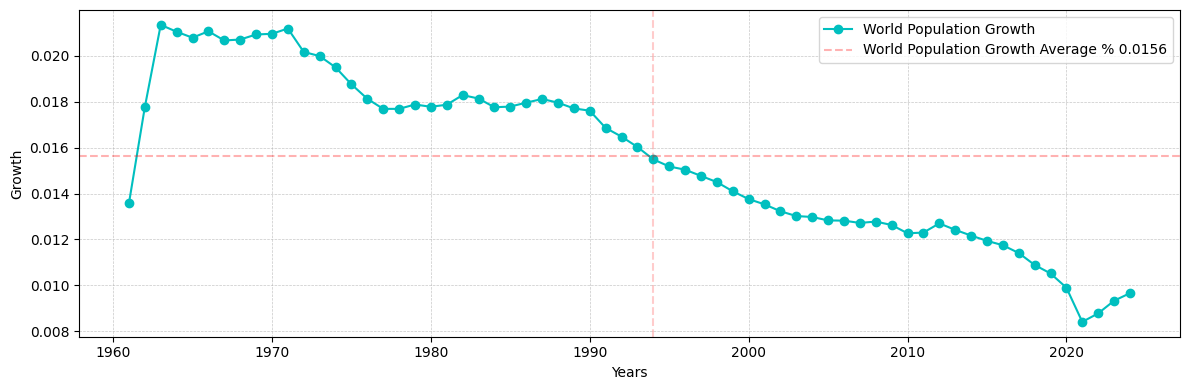

In [23]:
# Calculating average difference rage
avg_difference_rate = df['difference_rate'].mean()

# In order to add a vertical line to find where difference rate is same or close to average difference rate, 
# calculating difference between values and average difference rate. 
# From there, getting index number to get nearest value
nearest_year_index = abs(df['difference_rate'].dropna() - avg_difference_rate).sort_values().index[0]
nearest_year = df.iloc[nearest_year_index]['year']

# Visualizing world population growth rate over years
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(
    df['year'],
    df['difference_rate'],
    linestyle = "-",
    marker = "o",
    color = "c",
    label = "World Population Growth"
)

ax.set_xlabel("Years")
ax.set_ylabel("Growth")

ax.axhline(
    y=avg_difference_rate,
    linestyle = "--",
    color = "r",
    alpha=0.3,
    label = f"World Population Growth Average % {round(avg_difference_rate,4)}"
)

ax.axvline(
    x=nearest_year,
    linestyle = "--",
    color = "r",
    alpha=0.2
)
ax.grid(
    True,
    which='both',
    linestyle='--',
    linewidth=0.5,
    alpha=0.7
)

plt.tight_layout()
plt.legend()
plt.show()

In [24]:
# Calculating the top 3 years with the highest population for each country
# For each country, the query returns:

# The top 3 years with the highest population
query = (
"""
SELECT
    country_name,
    country_code,
    [year],
    pop,
    max_year - [year] AS since_max_year
FROM (
    SELECT 
        *,
        RANK() OVER (PARTITION BY country_name ORDER BY pop DESC) AS rank_by_pop,
        MAX([year]) OVER() AS max_year
    FROM country_population
) t
WHERE rank_by_pop <= 3
ORDER BY country_name ASC, [year] ASC;


""")

run_query(query)


,country_name,country_code,year,pop,since_max_year
0,Afghanistan,AFG,2022,40578842.0,2
1,Afghanistan,AFG,2023,41454761.0,1
2,Afghanistan,AFG,2024,42647492.0,0
3,Albania,ALB,1990,3286542.0,34
4,Albania,ALB,1991,3266790.0,33
...,...,...,...,...,...
646,Zambia,ZMB,2023,20723965.0,1
647,Zambia,ZMB,2024,21314956.0,0
648,Zimbabwe,ZWE,2022,16069056.0,2
649,Zimbabwe,ZWE,2023,16340822.0,1


In [30]:
# Fastest Growing Countries in the most recent year
query = (
"""
WITH recent_growth AS (
    SELECT
        country_name,
        year,
        pop,
        LAG(pop) OVER (PARTITION BY country_name ORDER BY year) AS prev_pop
    FROM country_population
)
SELECT TOP 10
    country_name,
    (pop - prev_pop) / 1e6 AS growth_millions
FROM recent_growth
WHERE year = (SELECT MAX(year) FROM country_population)
ORDER BY growth_millions DESC;
""")

run_query(query)

,country_name,growth_millions
0,India,12.866195
1,Nigeria,4.796533
2,Pakistan,3.764669
3,Congo Dem. Rep.,3.486534
4,Ethiopia,3.368075
5,United States,3.304757
6,Indonesia,2.297864
7,Bangladesh,2.095374
8,Egypt Arab Rep.,2.002486
9,Tanzania,1.942551


In [48]:
# Calculate each country's share of total population for the latest year


query = (
"""
SELECT
    country_name,
    pop,
    ROUND(pop / SUM(pop) OVER() * 100,2) AS pop_perc,
    CASE WHEN pop / SUM(pop) OVER() * 100 > 2 THEN country_name ELSE 'Other' END AS country,
    CASE WHEN pop / SUM(pop) OVER() * 100 > 2 THEN pop / SUM(pop) OVER() * 100 ELSE 0 END AS pop_perc_chart
FROM country_population
WHERE [year] = (SELECT MAX([year]) FROM country_population)
ORDER BY pop_perc DESC;
""")

pop_share = run_query(query)
pop_share

,country_name,pop,pop_perc,country,pop_perc_chart
0,India,1.450936e+09,17.87,India,17.872198
1,China,1.408975e+09,17.36,China,17.355337
2,United States,3.401110e+08,4.19,United States,4.189387
3,Indonesia,2.834879e+08,3.49,Indonesia,3.491920
4,Pakistan,2.512692e+08,3.10,Pakistan,3.095059
...,...,...,...,...,...
212,Samoa,2.180190e+05,0.00,Other,0.000000
213,British Virgin Islands,3.947100e+04,0.00,Other,0.000000
214,Virgin Islands (U.S.),1.043770e+05,0.00,Other,0.000000
215,St. Vincent and the Grenadines,1.006160e+05,0.00,Other,0.000000


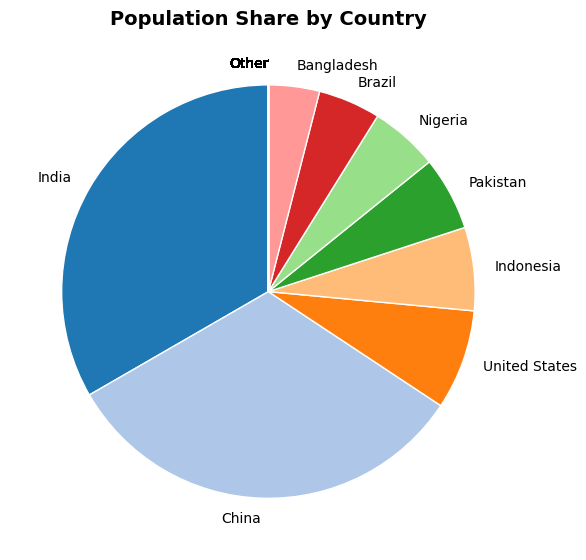

In [58]:
#Population Share by country in most recent year

fig, ax = plt.subplots(figsize=(6, 6))

colors = plt.cm.tab20.colors  # nice color palette

ax.pie(
    pop_share['pop_perc_chart'],
    labels=pop_share['country'],
   
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

ax.set_title('Population Share by Country', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
